In [32]:
import numpy as np
from sklearn.metrics import euclidean_distances
import pandas as pd
import minisom
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import KFold
import LVQ

In [33]:
data = pd.read_csv(r"data/SVNE_Hieu.csv")
x = data.iloc[:, 0:6].values
y = data.iloc[:, 6].values
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=20)

# use Minmaxscaler because we use euclidean distance
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
x_train = minmax.fit_transform(x_train)
x_test = minmax.transform(x_test)

In [34]:
# Training the SOM
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 6, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(x_train)
som.train_random(data = x_train, num_iteration = 100)

In [35]:
np.unique(y)

array([0, 1], dtype=int64)

In [36]:
labels = np.zeros((10, 10))
labels

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

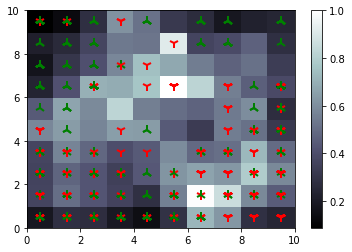

In [37]:
# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['1', '2', '3', '4', '8', 's', 'p', '>']
colors = ['r', 'g', 'b', 'y', 'w', 'c', 'm', 'k']
for i, x in enumerate(x_train):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y_train[i]],
         markeredgecolor = colors[y_train[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
    if y_train[i] == 0:
        labels[w[0], w[1]] -= 1
    elif y_train[i] == 1:
        labels[w[0], w[1]] += 1
show()

In [38]:
labels

array([[  2., -15.,  -3., -12.,  -5.,   1.,  38.,  18.,   2.,  35.],
       [ -2.,  -8.,  -5.,  -6.,   2.,   4.,   5.,   9.,  30.,  14.],
       [  3.,   2.,   7.,   1.,   0.,   0.,  32.,   8.,   6.,   7.],
       [ 54.,   6.,   0.,  -1.,  -1.,   0.,   0.,   0.,   0.,  -2.],
       [ 37.,  11.,   3.,  -1.,   2.,   0.,  -1.,  -1.,   0.,   5.],
       [ 40.,   1.,   0.,   0.,   0.,   0.,  -9.,   0.,  -1.,   0.],
       [  4.,   0.,  -9., -17.,   0.,   0.,   0.,   0.,   5.,  14.],
       [-19., -19., -24., -18.,  -3.,  -4.,  -6.,   0.,  19.,   4.],
       [-24., -23., -20.,  -3.,   7.,   2.,   2.,   0.,   0.,   0.],
       [-77., -48., -34.,   1.,   9.,   2.,  50.,   0.,   1.,  15.]])

In [39]:
# parameter for LVQ
R = 50 # R is the # of initial prototype for each class
n_classes = 2
epsilon = 0.9
epsilon_dec_factor = 0.001

In [40]:
# function to find the second closest prototype vector for a given vector
def find_runnerup(in_vector, proto_vectors):
    runnerup = None
    closest_p_vector = find_closest(in_vector, proto_vectors)
    closest_distance = 99999
    for p_v in proto_vectors:
        distance = np.linalg.norm(in_vector - p_v.p_vector)
        if (distance < closest_distance) and (p_v != closest_p_vector):
            closest_distance = distance
            runnerup = p_v
    return runnerup

In [41]:
from random import randint
p_vectors = []
for i in range(10):
    for j in range(10):
        if(labels[i][j] == 0):
            p = LVQ.prototype(randint(0,1), som.weights[(i,j)], epsilon)
            p_vectors.append(p)
        elif(labels[i][j] > 0):
            p = LVQ.prototype(1, som.weights[(i,j)], epsilon)
            p_vectors.append(p)
        elif(labels[i][j] < 0):
            p = LVQ.prototype(0, som.weights[(i,j)], epsilon)
            p_vectors.append(p)
print("class id \t Initial prototype vector \n")
for p_v in p_vectors:
    print(p_v.class_id, '\t', p_v.p_vector)

class id 	 Initial prototype vector 

1 	 [0.43827312 0.26339437 0.27743591 0.54430067 0.56499599 0.21467582]
0 	 [0.39233827 0.23914832 0.25842805 0.61485959 0.4568366  0.36788818]
0 	 [0.35247075 0.20735915 0.19362207 0.71643836 0.44348721 0.29208255]
0 	 [0.33238088 0.23776361 0.28529025 0.64203081 0.41807495 0.4057224 ]
0 	 [0.30302885 0.31896161 0.40797275 0.51429466 0.41592451 0.45000339]
1 	 [0.33441342 0.43901578 0.50083984 0.41264481 0.51357827 0.10273208]
1 	 [0.32383665 0.46565821 0.52565227 0.36479751 0.51782309 0.02764006]
1 	 [0.33402469 0.44438955 0.4988686  0.39434166 0.53501565 0.01812353]
1 	 [0.35420781 0.39223884 0.44169254 0.46803471 0.54869577 0.07395726]
1 	 [0.37005743 0.36732716 0.37953978 0.48816525 0.58798767 0.00655724]
0 	 [0.43404961 0.27620177 0.31317676 0.489939   0.59385043 0.21103384]
0 	 [0.39923675 0.27037795 0.30178786 0.56283413 0.51110454 0.31371923]
0 	 [0.38638525 0.24343999 0.24860461 0.64569134 0.48395453 0.28019611]
0 	 [0.36375429 0.24422862

In [42]:
lvq = LVQ.LVQ(x_train, y_train, n_classes=2, n_neurons=R, p_vectors=p_vectors, epsilon=0.9, epsilon_dec_factor=0.001)
neurons = lvq.fit(x_train, y_train)

In [43]:
predicted_y = [lvq.predict(instance) for instance in x_test]

from sklearn.metrics import classification_report

print (classification_report(y_test, predicted_y, target_names=['0', '1']))

             precision    recall  f1-score   support

          0       0.96      0.73      0.83        60
          1       0.82      0.97      0.89        73

avg / total       0.88      0.86      0.86       133



In [44]:
A = np.array(predicted_y)-y_test
len(A[A==0])/len(A)

0.8646616541353384